In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download mamta1999/cardiovascular-risk-data

  0% 0.00/59.3k [00:00<?, ?B/s]
100% 59.3k/59.3k [00:00<00:00, 47.2MB/s]


In [6]:
! unzip cardiovascular-risk-data.zip

Archive:  cardiovascular-risk-data.zip
  inflating: data_cardiovascular_risk.csv  


Данный датасет содержит различную информацию о пациентах, которая может помочь спрогнозировать риск возникновения у них ишемической болезни сердца.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [8]:
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [157]:
data = pd.read_csv('/content/data_cardiovascular_risk.csv')

In [10]:
data.shape

(3390, 17)

In [11]:
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [12]:
data.columns = ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']



*   id - идентификатор

*   age - возраст

*   education - уровень образования (от 1 до 4)

*   sex - пол

*   is_smoking - курит ли пациент в текущий момент

*   cigsPerDay - количество сигарет, которое пациент в среднем курит каждый день

*   BPMeds - принимает ли препараты для понижения кровеносного давления

*   prevalentStroke - были ли у пациента инсульты

*   prevalentHyp - является ли пациент гипертоником
*   diabetes - есть ли у пациента диабет


*   totChol - уровень холестерина


*   sysBP - верхнее значение кровеносного давления


*   diaBP - нижнее значение кровеносного давления


*   BMI - индекс массы тела


*   heartRate - частота сердечных сокращений


*   glucose - уровень глюкозы


*   TenYearCHD - риск возникновения ишемической болезни сердца

Требуется предсказать бинарный категориальный признак TenYearCHD по остальным признакам.



In [13]:
data.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

Приведем количество признаков, их среднее значение, стандартное отклонение, минимальное и максимальное значение, медиану и значения квартилей:

In [14]:
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


Для признаков типа object приведем их общее число, количество уникальных значений, самое частое значение и частоту его появления

In [15]:
data.describe(include = ['object'])

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


# Визуализация данных датасета

На следующих диаграммах можно наблюдать распределение признаков

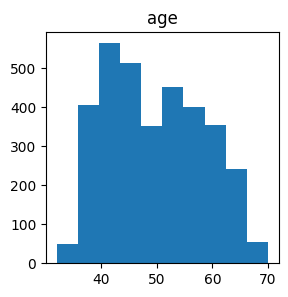

In [16]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "age"])
plt.title('age')
plt.show()

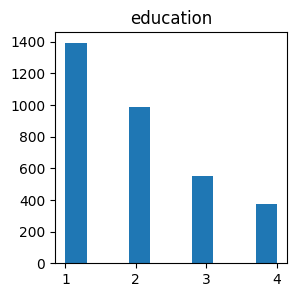

In [17]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "education"])
plt.title('education')
plt.show()

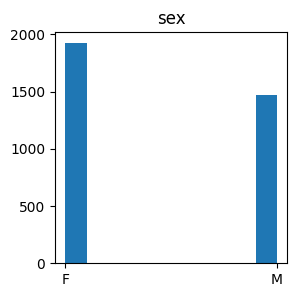

In [18]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "sex"])
plt.title('sex')
plt.show()

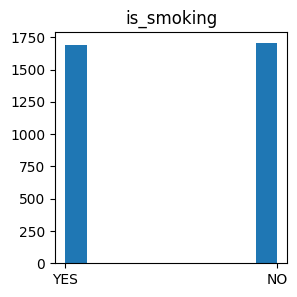

In [19]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "is_smoking"])
plt.title('is_smoking')
plt.show()

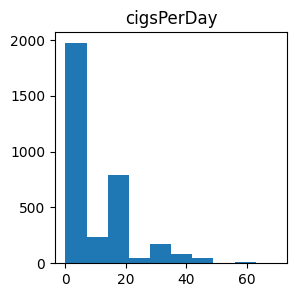

In [20]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "cigsPerDay"])
plt.title('cigsPerDay')
plt.show()

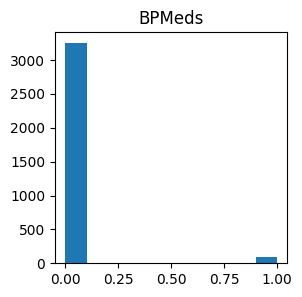

In [21]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "BPMeds"])
plt.title('BPMeds')
plt.show()

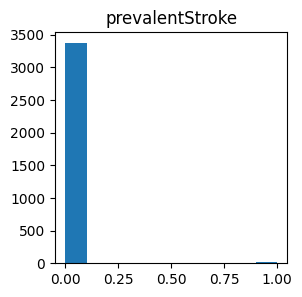

In [22]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "prevalentStroke"])
plt.title('prevalentStroke')
plt.show()

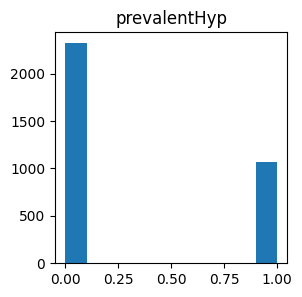

In [23]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "prevalentHyp"])
plt.title('prevalentHyp')
plt.show()

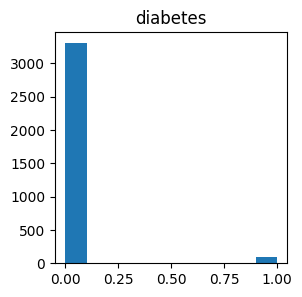

In [24]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "diabetes"])
plt.title('diabetes')
plt.show()

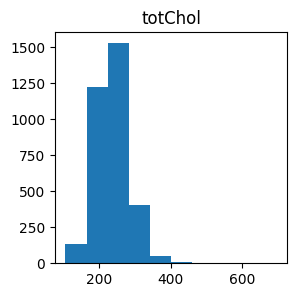

In [25]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "totChol"])
plt.title('totChol')
plt.show()

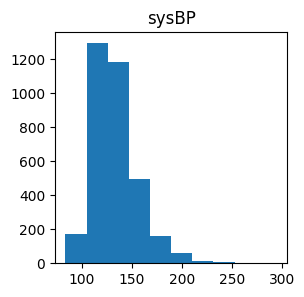

In [26]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "sysBP"])
plt.title('sysBP')
plt.show()

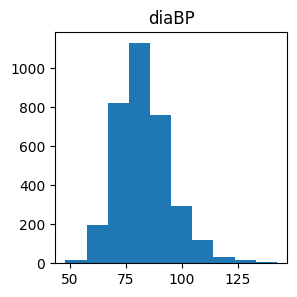

In [27]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "diaBP"])
plt.title('diaBP')
plt.show()

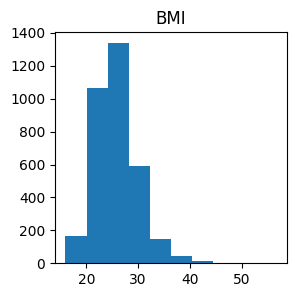

In [28]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "BMI"])
plt.title('BMI')
plt.show()

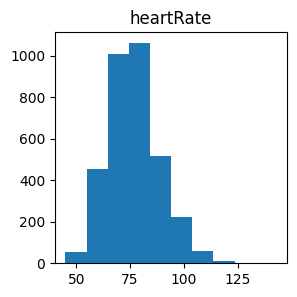

In [29]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "heartRate"])
plt.title('heartRate')
plt.show()

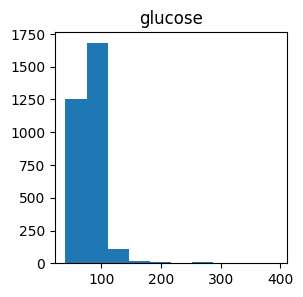

In [30]:
fig = plt.figure(figsize = (3, 3))
plt.hist(data.loc[:, "glucose"])
plt.title('glucose')
plt.show()

Теперь можно рассмотреть зависимость наличия риска возникновения ишемической болезни сердца от некоторых признаков:

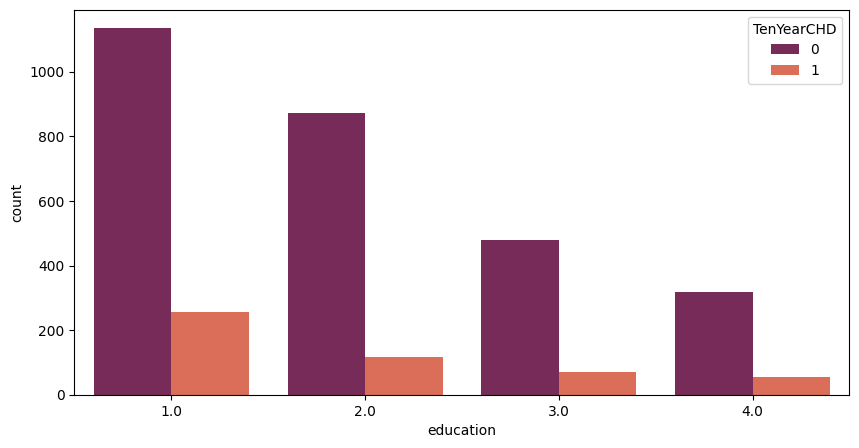

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue= 'TenYearCHD', data=data, palette='rocket')
pass

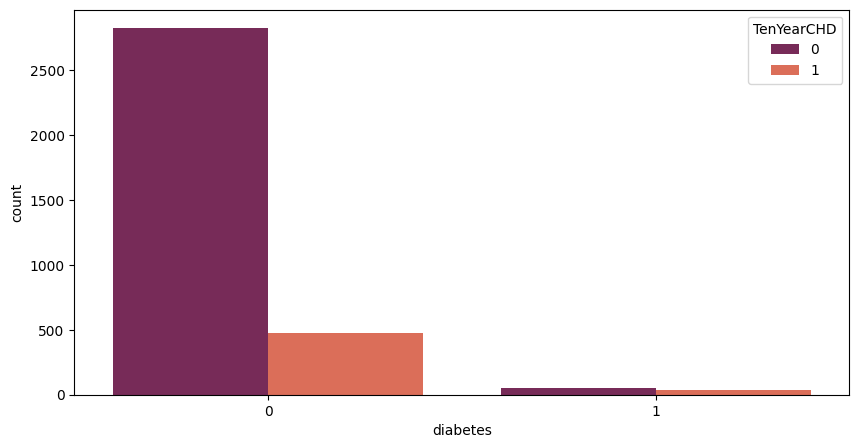

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='diabetes', hue= 'TenYearCHD', data=data, palette='rocket')
pass

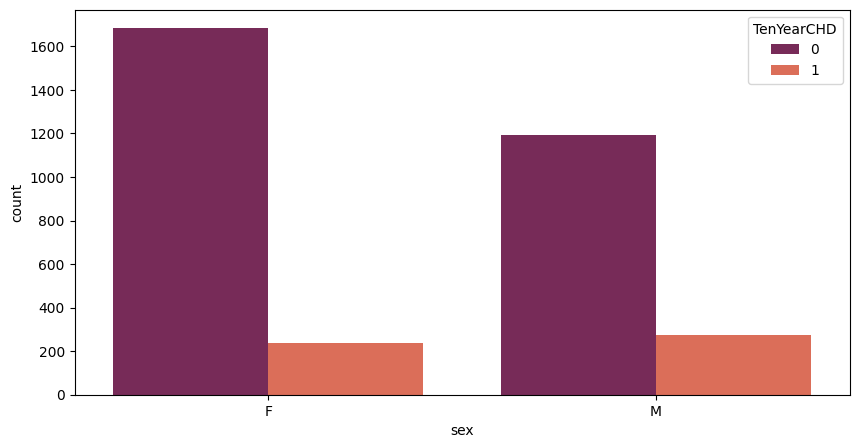

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex', hue= 'TenYearCHD', data=data, palette='rocket')
pass

Далее приведены диаграммы рассеивания для всех признаков. Информация выводится для датасета с удаленным признаком id.

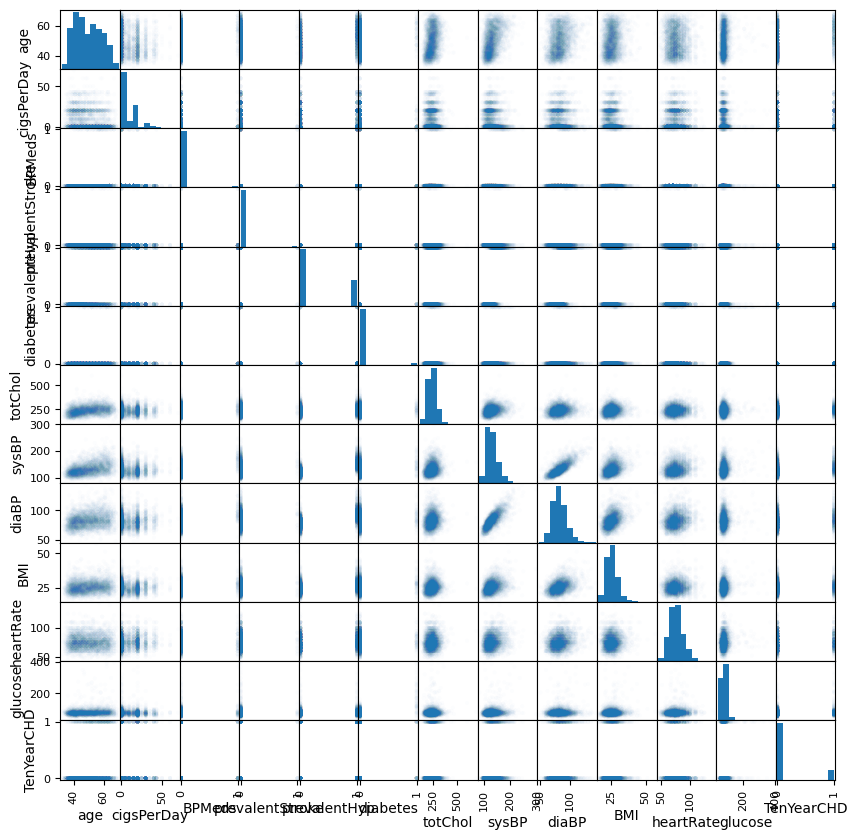

In [158]:
from pandas.plotting import scatter_matrix
data = data.drop('id', axis = 1)
data = data.drop('education', axis = 1)
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Теперь изобразим распределение некоторых признаков с помощью бокс-диаграмм:

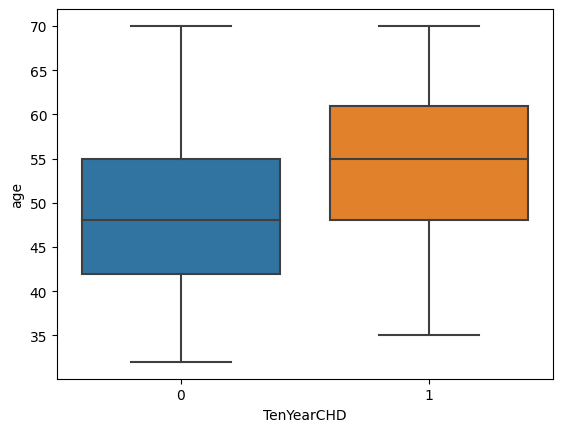

In [35]:
sns.boxplot(x=data["TenYearCHD"], y=data["age"]);
plt.show()

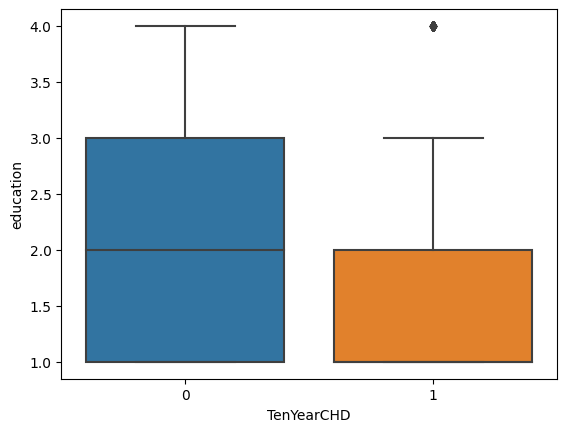

In [36]:
sns.boxplot(x=data["TenYearCHD"], y=data["education"]);
plt.show()

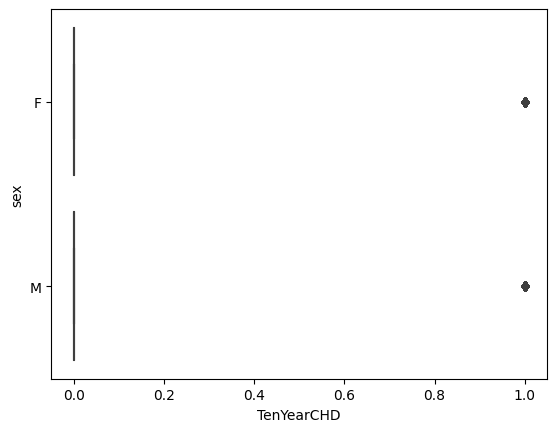

In [37]:
sns.boxplot(x=data["TenYearCHD"], y=data["sex"]);
plt.show()

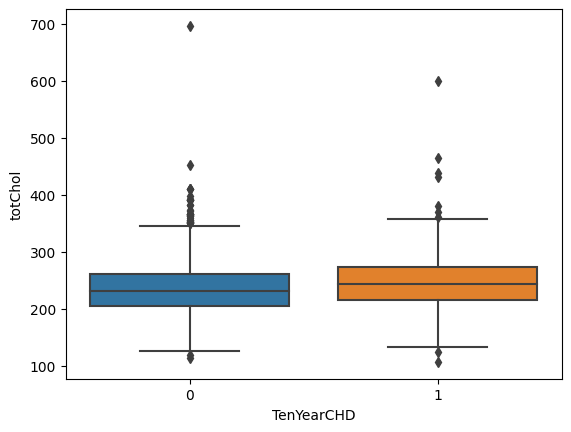

In [38]:
sns.boxplot(x=data["TenYearCHD"], y=data["totChol"]);
plt.show()

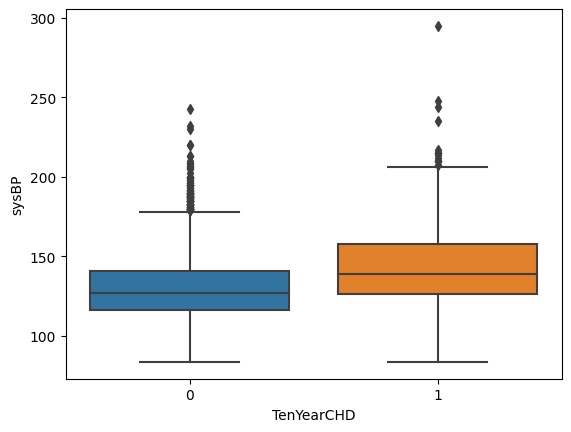

In [39]:
sns.boxplot(x=data["TenYearCHD"], y=data["sysBP"]);
plt.show()

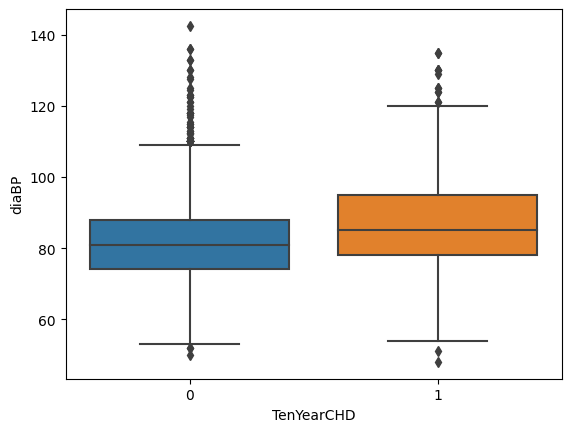

In [40]:
sns.boxplot(x=data["TenYearCHD"], y=data["diaBP"]);
plt.show()

Также изобразим распределение с помощью скрипичных графиков:

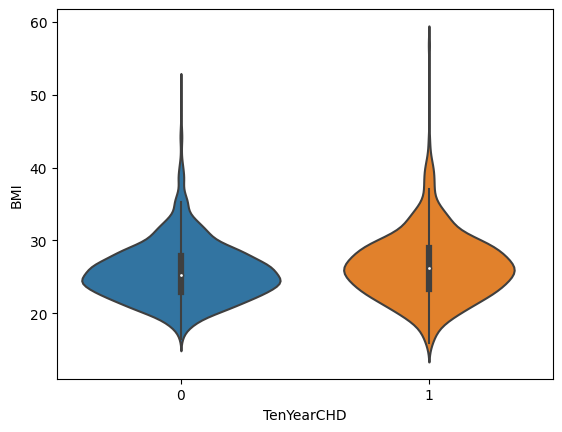

In [41]:
sns.violinplot(x=data["TenYearCHD"], y=data["BMI"]);
plt.show()

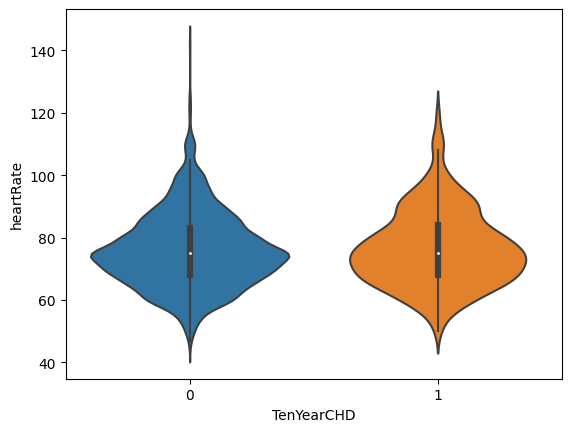

In [42]:
sns.violinplot(x=data["TenYearCHD"], y=data["heartRate"]);
plt.show()

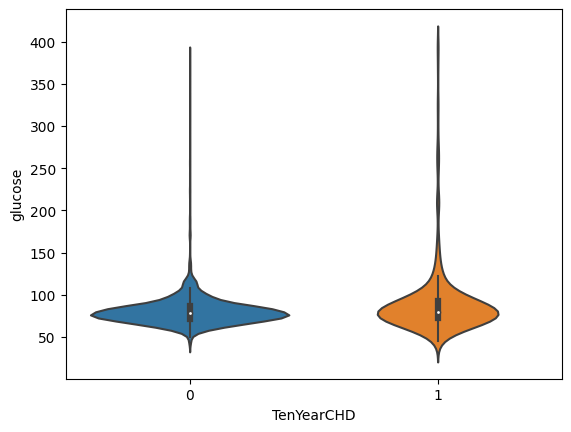

In [43]:
sns.violinplot(x=data["TenYearCHD"], y=data["glucose"]);
plt.show()

# Представим корреляционную матрицу по числовым признакам:

In [159]:
matrix = data.corr()
matrix

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.192335,0.124376,0.059038,0.308826,0.107875,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135,0.224927
cigsPerDay,-0.192335,1.000000,-0.037080,-0.042057,-0.079312,-0.049016,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797,0.066778
BPMeds,0.124376,-0.037080,1.000000,0.119402,0.259548,0.071316,0.083299,0.263729,0.201217,0.087932,0.018107,0.064490,0.088020
prevalentStroke,0.059038,-0.042057,0.119402,1.000000,0.071652,0.010115,-0.010832,0.057568,0.047235,0.018602,-0.019184,0.023607,0.068627
prevalentHyp,0.308826,-0.079312,0.259548,0.071652,1.000000,0.082565,0.159680,0.699285,0.612897,0.300464,0.150815,0.086658,0.166544
diabetes,0.107875,-0.049016,0.071316,0.010115,0.082565,1.000000,0.059080,0.124011,0.061165,0.089112,0.039742,0.620211,0.103681
totChol,0.274028,-0.024703,0.083299,-0.010832,0.159680,0.059080,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723,0.094306
sysBP,0.404845,-0.100834,0.263729,0.057568,0.699285,0.124011,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090,0.212703
diaBP,0.221896,-0.068785,0.201217,0.047235,0.612897,0.061165,0.154974,0.781908,1.000000,0.380498,0.174904,0.071499,0.135979
BMI,0.138176,-0.100996,0.087932,0.018602,0.300464,0.089112,0.114305,0.333864,0.380498,1.000000,0.069655,0.093454,0.066947


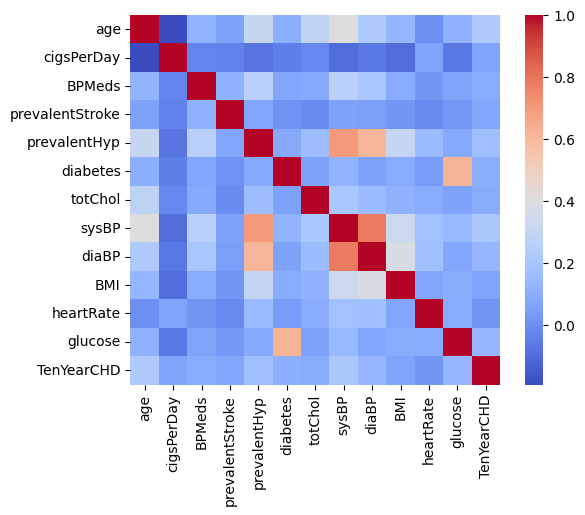

In [160]:
sns.heatmap(matrix, square=True, cmap='coolwarm')
pass

# Обработка пропущенных значений

In [161]:
data.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [162]:
data.fillna(data.median(axis = 0, numeric_only = True), axis = 0, inplace = True)
data.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Векторизация признаков

In [163]:
object_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('object_columns=', object_columns)
print('numerical_columns=', numerical_columns)

object_columns= ['sex', 'is_smoking']
numerical_columns= ['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [164]:
data_describe = data.describe(include=['object'])
binary_columns    = [c for c in object_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in object_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= ['sex', 'is_smoking']
nonbinary_columns= []


Так как в данном датасете присутствуют только бинарные нечисловые признаки, их значения можно заменить числами '1' и '0':

In [165]:
data=data.replace(to_replace="F",value=0)
data=data.replace(to_replace="M",value=1)
data=data.replace(to_replace="NO",value=0)
data=data.replace(to_replace="YES",value=1)
data['sex'] = data['sex'].astype(int)
data['is_smoking'] = data['is_smoking'].astype(int)

In [166]:
data

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [167]:
data.dtypes

age                  int64
sex                  int64
is_smoking           int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

# Нормализация

Ввиду намерения использовать метод k-ближайших соседей, нормализуем значения признаков. Это поможет убрать большее влияние на дистанцию признаков с большими диапазанами.

In [168]:
data_withoutTenYearCHD = data.drop('TenYearCHD', axis = 1)
data_withoutTenYearCHD = (data_withoutTenYearCHD - data_withoutTenYearCHD.mean(axis = 0)) / data_withoutTenYearCHD.std(axis = 0)
data_withoutTenYearCHD.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03
mean,-8.383985e-18,-2.357996e-17,-8.226785e-17,-9.222384e-17,3.667993e-18,3.982393e-17,1.047998e-18,7.755186e-17,-2.022636e-16,-1.865437e-16,2.468036e-16,2.892475e-16,4.275832e-16,1.152798e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.041479e+00,-8.732958e-01,-9.951445e-01,-7.595669e-01,-1.743163e-01,-8.080928e-02,-6.785584e-01,-1.622711e-01,-2.890146e+00,-2.202634e+00,-2.901219e+00,-2.394251e+00,-2.587861e+00,-1.801286e+00
25%,-8.777249e-01,-8.732958e-01,-9.951445e-01,-7.595669e-01,-1.743163e-01,-8.080928e-02,-6.785584e-01,-1.622711e-01,-6.898627e-01,-6.998546e-01,-6.972164e-01,-6.728107e-01,-6.664090e-01,-4.196687e-01
50%,-6.309677e-02,-8.732958e-01,-9.951445e-01,-7.595669e-01,-1.743163e-01,-8.080928e-02,-6.785584e-01,-1.622711e-01,-6.756032e-02,-1.839752e-01,-7.344221e-02,-1.006204e-01,-8.161920e-02,-1.606155e-01
75%,7.515313e-01,1.144750e+00,1.004583e+00,9.263702e-01,-1.743163e-01,-8.080928e-02,1.473278e+00,-1.622711e-01,5.991922e-01,5.113406e-01,5.919170e-01,5.367021e-01,5.867120e-01,1.416132e-01
max,2.380788e+00,1.144750e+00,1.004583e+00,5.141213e+00,5.735006e+00,1.237117e+01,1.473278e+00,6.160708e+00,1.020043e+01,7.285062e+00,4.958337e+00,7.549685e+00,5.599196e+00,1.348285e+01


In [169]:
data_new = pd.concat((data_withoutTenYearCHD, data['TenYearCHD']), axis = 1)
data_new

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.682535,-0.873296,1.004583,-0.506676,-0.174316,-0.080809,-0.678558,-0.162271,-0.356486,0.690777,0.176067,-0.100620,1.171502,-0.074264,1
1,-1.575978,1.144750,-0.995145,-0.759567,-0.174316,-0.080809,1.473278,-0.162271,-0.556512,1.587959,1.257276,0.968280,-0.332243,-0.290142,0
2,-0.412223,-0.873296,1.004583,0.083402,-0.174316,-0.080809,-0.678558,-0.162271,0.288041,-0.744714,-0.988311,-1.325351,1.004419,0.530193,0
3,0.053279,1.144750,1.004583,0.926370,-0.174316,-0.080809,1.473278,-0.162271,-0.089785,1.139368,0.425577,0.600617,-0.666409,0.530193,1
4,1.682535,-0.873296,1.004583,1.769339,-0.174316,-0.080809,-0.678558,-0.162271,0.088015,0.174897,0.176067,0.152604,-0.499326,-0.203791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.217033,-0.873296,-0.995145,-0.759567,-0.174316,-0.080809,-0.678558,-0.162271,0.532517,-0.408271,-0.322952,0.848972,-0.499326,0.918773,0
3386,-0.412223,-0.873296,-0.995145,-0.759567,-0.174316,-0.080809,-0.678558,-0.162271,-0.845438,-1.372741,-2.235860,-0.933340,0.336088,0.098438,0
3387,-0.644974,1.144750,1.004583,-0.506676,-0.174316,-0.080809,1.473278,-0.162271,2.555000,1.408522,3.003844,0.761317,-0.248702,-0.419669,1
3388,1.217033,1.144750,-0.995145,-0.759567,-0.174316,-0.080809,1.473278,-0.162271,-1.023239,1.543100,1.839465,-0.677680,0.336088,0.141613,0


# Разбиение на обучающую и тестовую выборки

Для классификации будем использовать все признаки.

In [170]:
data_new

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.682535,-0.873296,1.004583,-0.506676,-0.174316,-0.080809,-0.678558,-0.162271,-0.356486,0.690777,0.176067,-0.100620,1.171502,-0.074264,1
1,-1.575978,1.144750,-0.995145,-0.759567,-0.174316,-0.080809,1.473278,-0.162271,-0.556512,1.587959,1.257276,0.968280,-0.332243,-0.290142,0
2,-0.412223,-0.873296,1.004583,0.083402,-0.174316,-0.080809,-0.678558,-0.162271,0.288041,-0.744714,-0.988311,-1.325351,1.004419,0.530193,0
3,0.053279,1.144750,1.004583,0.926370,-0.174316,-0.080809,1.473278,-0.162271,-0.089785,1.139368,0.425577,0.600617,-0.666409,0.530193,1
4,1.682535,-0.873296,1.004583,1.769339,-0.174316,-0.080809,-0.678558,-0.162271,0.088015,0.174897,0.176067,0.152604,-0.499326,-0.203791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.217033,-0.873296,-0.995145,-0.759567,-0.174316,-0.080809,-0.678558,-0.162271,0.532517,-0.408271,-0.322952,0.848972,-0.499326,0.918773,0
3386,-0.412223,-0.873296,-0.995145,-0.759567,-0.174316,-0.080809,-0.678558,-0.162271,-0.845438,-1.372741,-2.235860,-0.933340,0.336088,0.098438,0
3387,-0.644974,1.144750,1.004583,-0.506676,-0.174316,-0.080809,1.473278,-0.162271,2.555000,1.408522,3.003844,0.761317,-0.248702,-0.419669,1
3388,1.217033,1.144750,-0.995145,-0.759567,-0.174316,-0.080809,1.473278,-0.162271,-1.023239,1.543100,1.839465,-0.677680,0.336088,0.141613,0


In [171]:
x = data_new.drop('TenYearCHD', axis = 1)
y = data_new['TenYearCHD']
names = x.columns

In [172]:
x = x.to_numpy()
y = y.to_numpy()

In [173]:
x.shape

(3390, 14)

In [174]:
y.shape

(3390,)

Данные разбиваются в следующем соотнощении: 75% - обучающая выборка, 25% - тестовая.

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 66)
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

In [176]:
N_train

2542

In [177]:
N_test

848

# Метод k-ближайших соседей

In [178]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [179]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.1474056603773585

Подберем параметр для уменьшения ошибки:

In [180]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

In [181]:
best_cv_err, best_n_neighbors

(0.14909217230199157, 15)

Вычисление ошибки на выборках:

In [182]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

In [183]:
err_train, err_test

(0.14752163650668765, 0.14976415094339623)

 Как можно видеть, при лучшем значении параметра k = 10, ошибка на обучающей выборке составила 14.7%, а на тестовой 14.9%. Это говорит о том, что при использовании метода k-ближайших соседей не происходит переобучения. Однако процент ошибки достаточно велик, а увеличение параметра k не приводит к лучшем результатам.

# Random Forest

In [184]:
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
rf = ensemble.RandomForestClassifier(n_estimators = 500)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(err_train, err_test)
print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_pred)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}", end="\n\n")

0.0 0.14976415094339623
train confusion matrix:
[[2156    0]
 [   0  386]]

test confusion matrix:
[[714   9]
 [118   7]]



# Логистическая регрессия

In [224]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print(err_train, err_test)
print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_pred)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}", end="\n\n")

0.14240755310778913 0.13561320754716982
train confusion matrix:
[[2147    9]
 [ 353   33]]

test confusion matrix:
[[719   4]
 [111  14]]



# MLP

In [222]:
from sklearn import neural_network
mlpCLassifier = neural_network.MLPClassifier(hidden_layer_sizes = (100, 50,), alpha = 0.001, max_iter=500,
                          solver = 'adam', activation = 'logistic', random_state = 1)
mlpCLassifier.fit(X_train, y_train)

err_train = np.mean(y_train != mlpCLassifier.predict(X_train))
err_test  = np.mean(y_test  != mlpCLassifier.predict(X_test))

y_train_pred = mlpCLassifier.predict(X_train)
y_test_pred = mlpCLassifier.predict(X_test)

print(err_train, err_test)
print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_pred)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}", end="\n\n")

0.14122738001573565 0.1391509433962264
train confusion matrix:
[[2151    5]
 [ 354   32]]

test confusion matrix:
[[720   3]
 [115  10]]



In [200]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = neural_network.MLPClassifier(alpha = alpha, hidden_layer_sizes = (20,30,), solver = 'adam', activation = 'logistic', max_iter=500, random_state = 1)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

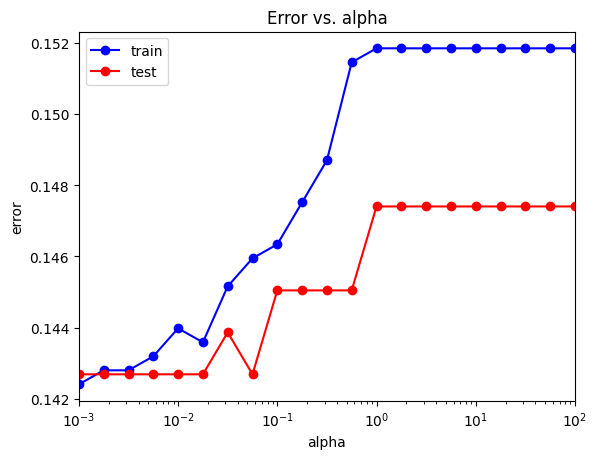

In [201]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

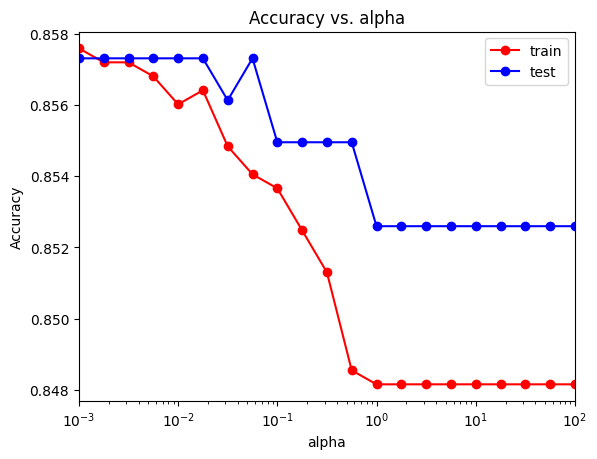

In [202]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Теперь подберем параметры для уменьшения ошибки:

In [219]:
mlp = neural_network.MLPClassifier(solver = 'adam', activation = 'logistic', max_iter=500, random_state = 1)
param_grid = {
    'hidden_layer_sizes': [(200, 50), (150, 50,), (100, 50,)],
    'alpha': [0.0001, 0.001, 0.1]
}
grid = GridSearchCV(mlp, param_grid, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
print(grid.best_params_)

{'alpha': 0.0001, 'hidden_layer_sizes': (150, 50)}


In [216]:
best_cv_err

0.1467351453366954

In [223]:
mlpCLassifier = neural_network.MLPClassifier(hidden_layer_sizes = (150, 50,), alpha = 0.0001, max_iter=500,
                          solver = 'adam', activation = 'logistic', random_state = 1)
mlpCLassifier.fit(X_train, y_train)

err_train = np.mean(y_train != mlpCLassifier.predict(X_train))
err_test  = np.mean(y_test  != mlpCLassifier.predict(X_test))

y_train_pred = mlpCLassifier.predict(X_train)
y_test_pred = mlpCLassifier.predict(X_test)

print(err_train, err_test)
print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_pred)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}", end="\n\n")

0.14083398898505115 0.1403301886792453
train confusion matrix:
[[2149    7]
 [ 351   35]]

test confusion matrix:
[[719   4]
 [115  10]]



# Результаты

Наименьшую тестовую ошибку показал метод логистической регрессии. За ним идет полносвязная нейронная сеть, а в конце - random forest метод. Все методы показали низкую точность классификации, что можно заметить на confusion matrix, при этом, на выбранных параметрах отсутствует переобучение.

Потенциальным способом борьбы с низкой точностью будет добавление или устранение представителей классов для балансировки признаков. Кроме этого, улучшение точности классификации может быть достигнуто путем полного устранения выбросов.

# Вывод

Таким образом, в данной работе была рассмотрена задача классификации с помощью метода k-ближайших соседей, Random forest, логистической регрессии и полносвязной сети, выполнена визуализация данных датасета, а также вычислены его основные характеристики. Были обработаны пропущенные значения, обработаны категориальные признаки, осуществлена нормализация некоторых признаков.